# Zurich lock-in results

In [184]:
import pandas as pd
df1=pd.read_csv("Ch2andCh1.txt", skiprows=9,skipfooter=199, sep=';', names=('Freq','Amp1','Amp2'), engine='python' )
df1.head()

,Freq,Amp1,Amp2
0,1000.000000,0.061356,0.001469
1,1037.433476,0.061915,0.001537
2,1076.268216,0.062445,0.001607
3,1116.556676,0.062950,0.001680
4,1158.353274,0.063432,0.001756


In [185]:
type(df1.Freq[0])

numpy.float64

In [186]:
df2=pd.read_csv("Ch2andCh1.txt", skiprows=208,skipfooter=0, sep=';', names=('Freq','Phs1','Phs2'), engine='python')
df2.head()

,Freq,Phs1,Phs2
0,1000.000000,29.454823,118.077417
1,1037.433476,28.529020,117.092543
2,1076.268216,27.624826,116.097871
3,1116.556676,26.738228,115.150437
4,1158.353274,25.868292,114.200396


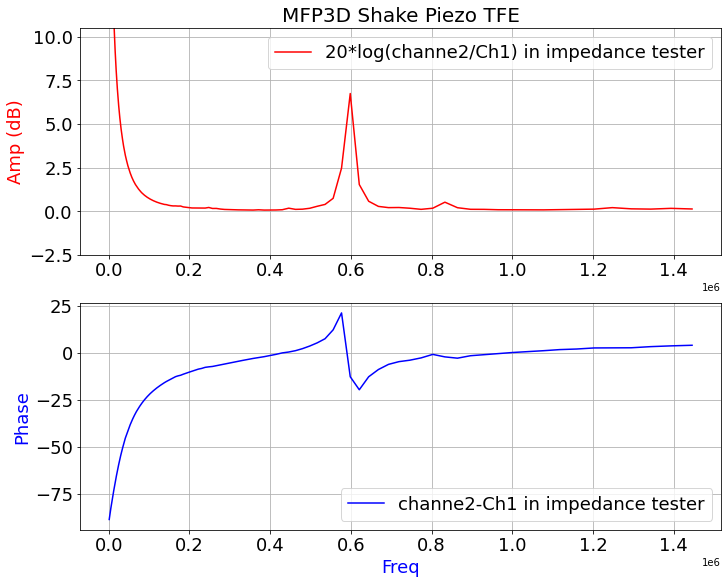

In [187]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax0,ax1)=plt.subplots(nrows=2,ncols=1, figsize=(10,8),constrained_layout=True)

# no space between h space

# amp vs Freq
ax0.plot(df1.Freq, 20*np.log10(df1.Amp1/df1.Amp2),'r', label='20*log(channe2/Ch1) in impedance tester')
#ax0.plot(df1.Freq, df1.Amp2,'b', label='channe1 in impedance tester')
ax0.set_ylabel('Amp (dB)', fontsize=18,color='r')
ax0.tick_params(axis='both',labelsize=18)
#ax0.set_yscale('log')
ax0.set_ylim(-2.5,10.5)
ax0.grid()
ax0.legend(fontsize=18)
ax0.set_title("MFP3D Shake Piezo TFE",fontsize=20)


# first Amp from LabOne
ax1.plot(df2.Freq, df2.Phs1-df2.Phs2,'b', label='channe2-Ch1 in impedance tester')
#ax1.plot(df2.Freq, df2.Phs2,'b', label='channe1 in impedance tester')
ax1.set_ylabel('Phase', fontsize=18, color='b')
ax1.tick_params(axis='both',labelsize=18)
ax1.grid()
ax1.legend(fontsize=18)

ax1.set_xlabel('Freq', fontsize=18, color='b')

plt.show()

# LTSPice Model

In [191]:
# read Spice export dat

df3=pd.read_csv("Piezo300In.txt",skiprows=1,sep=',|\r',encoding='latin1',names=('Freq', 'Amp','Phs') )


df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Freq,Amp,Phs
0,1000.000000,34.766888,-88.949946
1,1006.955550,34.706702,-88.942644
2,1013.959480,34.646517,-88.935291
3,1021.012126,34.586331,-88.927887
4,1028.113827,34.526147,-88.920431


Text(0.5, 1.0, 'Shake Piezo Impedance Amplitude \n LTSPice vs ZI lockin')

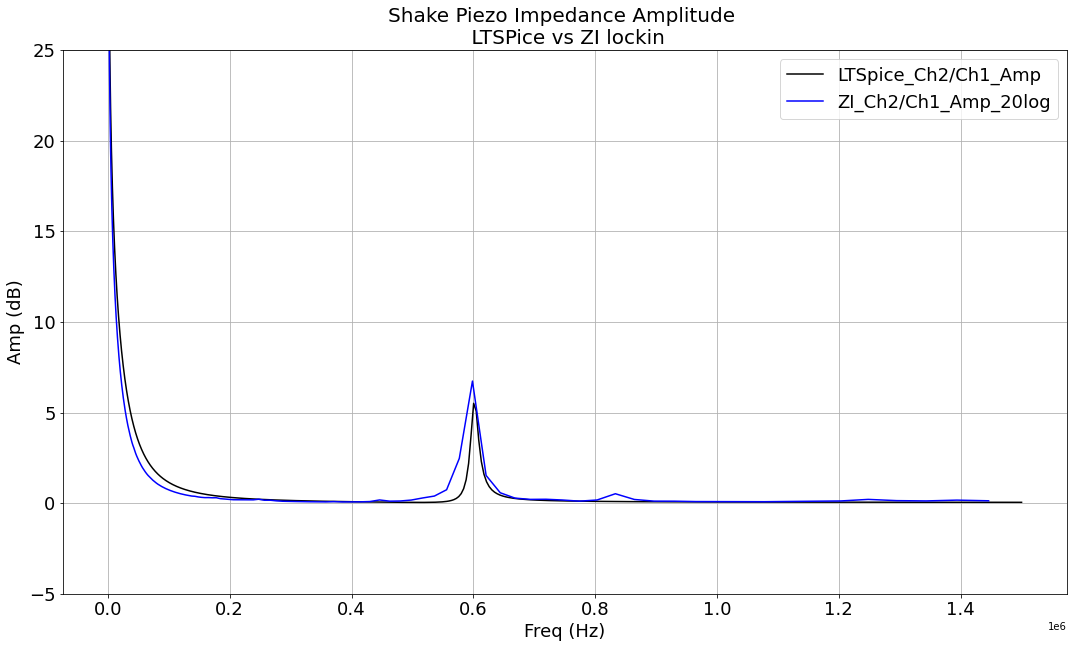

In [192]:
plt.figure(figsize=(18,10))

# LTSPice Simulation

# plt.plot(df3.Freq, df3.Ch2_Amp, 'k*--',label='LTSpice_Ch2_Amp')
# plt.plot(df3.Freq, df3.Ch1_Amp,'k--',label='LTSpice_Ch1_Amp')
plt.plot(df3.Freq, df3.Amp,'k',label='LTSpice_Ch2/Ch1_Amp')

# from ZI lock in result
# plt.plot(df1.Freq,20*np.log10(df1.Amp1),'b*--',label='ZI_Ch2_Amp_20log')
# plt.plot(df1.Freq,20*np.log10(df1.Amp2),'b--',label='ZI_Ch1_Amp_20log')
plt.plot(df1.Freq,20*np.log10(df1.Amp1/df1.Amp2),'b',label='ZI_Ch2/Ch1_Amp_20log')

# figure appearance
plt.xlabel('Freq (Hz)', fontsize=18)
plt.ylabel('Amp (dB)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)
plt.grid()
plt.ylim(-5,25)
plt.title("Shake Piezo Impedance Amplitude \n LTSPice vs ZI lockin",fontsize=20)

# HP vector analyzer

In [193]:
df4=pd.read_csv('PZ_baby.txt',header=None, sep='\,|\ ',names=('Freq','Real','Imag'))
df4.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Freq,Real,Imag
0,1000.0,1.093566,-0.334897
1,4747.5,1.014262,-1.315270
2,8495.0,0.986057,-3.849778
3,12242.5,1.041678,-2.600302
4,15990.0,1.011236,-1.868170


In [194]:
import numpy as np
import math

df4['Mag']=20*np.log10(df4['Real']*df4['Real']+df4['Imag']*df4['Imag'])
df4['Phase']=np.arctan(df4['Imag']/df4['Real'])*180/math.pi
df4.head()

,Freq,Real,Imag,Mag,Phase
0,1000.0,1.093566,-0.334897,2.332438,-17.026849
1,4747.5,1.014262,-1.315270,8.813972,-52.362618
2,8495.0,0.986057,-3.849778,23.969347,-75.633488
3,12242.5,1.041678,-2.600302,17.893701,-68.169018
4,15990.0,1.011236,-1.868170,13.088647,-61.573422


# Plot the results

Text(0.5, 1.0, 'Shake Piezo Impedance Amplitude \n LTSPice vs ZI lockin vs HP VNA')

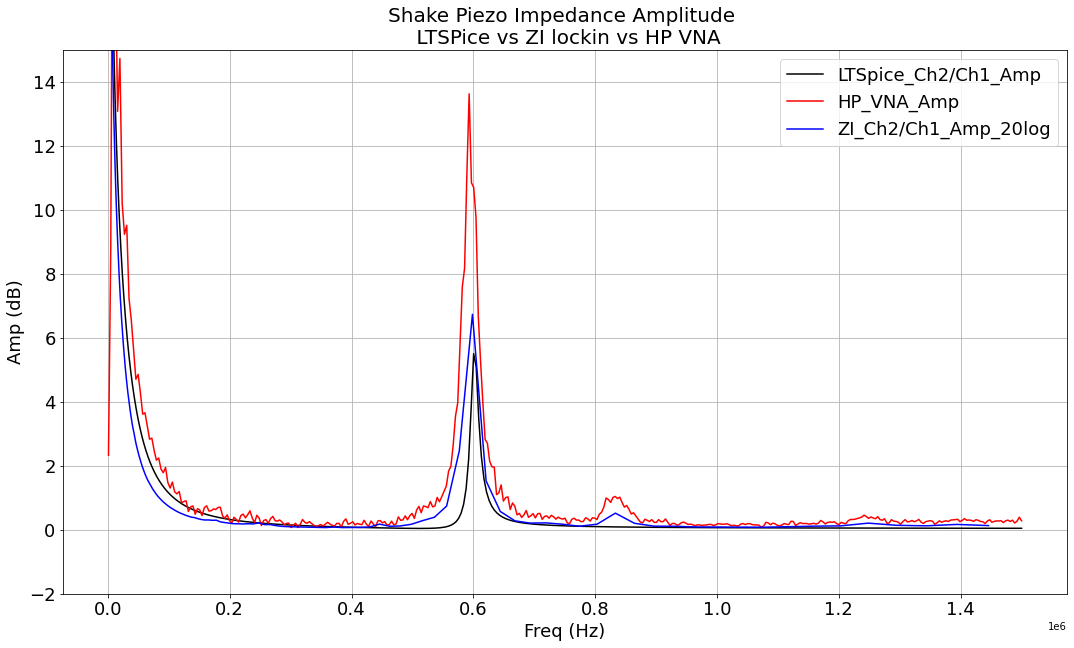

In [200]:
plt.figure(figsize=(18,10))

# LTSPice Simulation

# plt.plot(df3.Freq, df3.Ch2_Amp, 'k*--',label='LTSpice_Ch2_Amp')
# plt.plot(df3.Freq, df3.Ch1_Amp,'k--',label='LTSpice_Ch1_Amp')
plt.plot(df3.Freq, df3.Amp,'k',label='LTSpice_Ch2/Ch1_Amp')

#from baby
plt.plot(df4.Freq, df4.Mag,'r',label='HP_VNA_Amp')

# from ZI lock in result
# plt.plot(df1.Freq,20*np.log10(df1.Amp1),'b*--',label='ZI_Ch2_Amp_20log')
# plt.plot(df1.Freq,20*np.log10(df1.Amp2),'b--',label='ZI_Ch1_Amp_20log')
plt.plot(df1.Freq,20*np.log10(df1.Amp1/df1.Amp2),'b',label='ZI_Ch2/Ch1_Amp_20log')

# figure appearance
plt.xlabel('Freq (Hz)', fontsize=18)
plt.ylabel('Amp (dB)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)
plt.grid()
plt.ylim(-2,15)
plt.title("Shake Piezo Impedance Amplitude \n LTSPice vs ZI lockin vs HP VNA",fontsize=20)

Text(0.5, 1.0, 'Shake Piezo Impedance Pphase \n LTSPice vs ZI lockin vs HP_VNA')

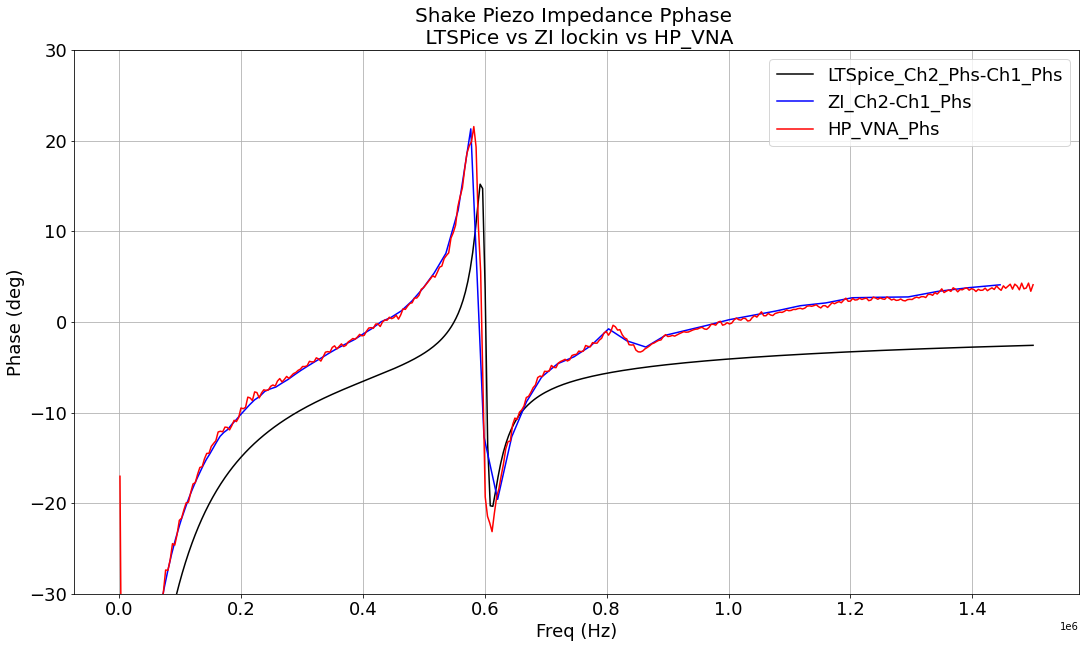

In [203]:
# LTSPice Simulation
plt.figure(figsize=(18,10))
# plt.plot(df3.Freq, df3.Ch2_Phs,'k*--',label='LTSpice_Ch2_Phs')
# plt.plot(df3.Freq, df3.Ch1_Phs,'k--',label='LTSpice_Ch1_Phs')
plt.plot(df3.Freq, df3.Phs,'k',label='LTSpice_Ch2_Phs-Ch1_Phs')

# from ZI lock in result
# plt.plot(df2.Freq,df2.Phs1,'b*--',label='ZI_Ch2_Phs')
# plt.plot(df2.Freq,df2.Phs2,'b--',label='ZI_Ch1_Phs')
plt.plot(df2.Freq,df2.Phs1-df2.Phs2,'b',label='ZI_Ch2-Ch1_Phs')

#from the Baby
plt.plot(df4.Freq,df4.Phase,'r',label='HP_VNA_Phs')

# figure appearance
plt.xlabel('Freq (Hz)', fontsize=18)
plt.ylabel('Phase (deg)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)
plt.grid()
plt.ylim(-30,30)

plt.title("Shake Piezo Impedance Pphase \n LTSPice vs ZI lockin vs HP_VNA",fontsize=20)